In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\AGN\AppData\Local\Temp\ipykernel_12516\2621147566.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("sn.dat", delim_whitespace=True)


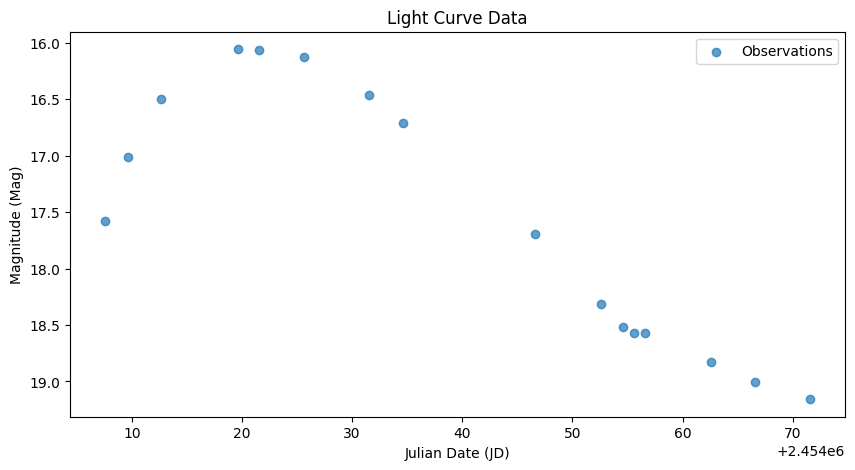

,JD,Mag,JD_norm
0,2454007.602,17.583,0.000000
1,2454009.663,17.011,0.032224
2,2454012.606,16.501,0.078238
3,2454019.605,16.059,0.187667
4,2454021.579,16.064,0.218531


In [17]:
# 데이터 로드 (공백을 기준으로 구분)
df = pd.read_csv("sn.dat", delim_whitespace=True)

# 필요한 열만 선택 (JD: 시간, Mag: 광도)
df = df[["JD", "Mag"]]

# JD 값을 정규화 (0~1 범위)
df["JD_norm"] = (df["JD"] - df["JD"].min()) / (df["JD"].max() - df["JD"].min())

# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.scatter(df["JD"], df["Mag"], alpha=0.7, label="Observations")
plt.xlabel("Julian Date (JD)")
plt.ylabel("Magnitude (Mag)")
plt.title("Light Curve Data")
plt.gca().invert_yaxis()  # 천문학에서 등급은 값이 작을수록 밝음
plt.legend()
plt.show()

# 데이터 샘플 확인
df.head()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
X = df[["JD_norm"]].valu
Y = df["Mag"].values

In [33]:
n = range(1, 16)
scores = []

for i in n:
    model = make_pipeline(PolynomialFeatures(i), LinearRegression())
    score = np.mean(cross_val_score(model, X, Y, cv=16, scoring="neg_mean_squared_error"))
    scores.append(score)

best_result = n[np.argmax(scores)]

print("Best result :", best_result)

Best result : 6


In [34]:
model_awesome = make_pipeline(PolynomialFeatures(best_result), LinearRegression())
model_awesome.fit(X,Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [35]:
X_p = np.linspace(0, 1, 100). reshape(-1, 1)
Y_p = model_awesome.predict(X_p)

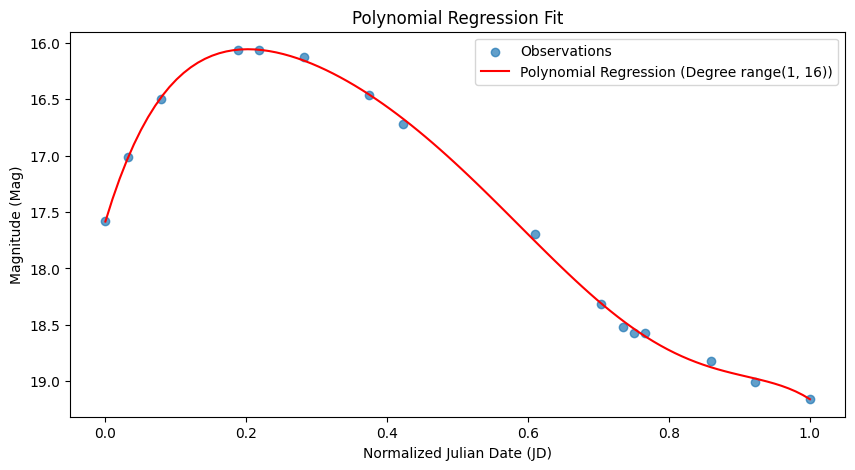

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(df["JD_norm"], df["Mag"], alpha=0.7, label="Observations")
plt.plot(X_p, Y_p, color="red", label=f"Polynomial Regression (Degree {n})")
plt.xlabel("Normalized Julian Date (JD)")
plt.ylabel("Magnitude (Mag)")
plt.title("Polynomial Regression Fit")
plt.gca().invert_yaxis()
plt.legend()
plt.show()